# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.max_colwidth', None)



## 3.4 Functions<a id='3.4_Load_The_Data'></a>

In [2]:
#return the first 5 and last 5 rows of this dataframe
def p(df_):
    if df_.shape[0] > 6:
        print(df_.shape)
        return pd.concat([df_.head(), df_.tail()])
    else:
        return df_

def rcp(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'processed_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'processed_data', file_), parse_dates=pd_)
    
def rcr(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'raw_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'raw_data', file_), parse_dates=pd_)
    
#sort dataframe by column
def s(df_, column_):
    return df_.sort_values(column_)

#reset index and sort dataframe by column
def sr(df_, column_, ascending_=True):
    df_ = df_.sort_values(column_, ascending=ascending_)
    return df_.reset_index(drop=True)

#print length of list
def pl(list_):
    print(len(list_))
    return list_

#print length of list
def pdc(dict_):
    print(len(dict_))
    return dict_

## 3.4 Load Data<a id='3.4_Load_The_Data'></a>

In [3]:
df = rcr('adult.csv')
p(df)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
pd.options.display.max_info_columns = 999
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df_gender_income = df.groupby(['gender'])['income'].value_counts().unstack().reset_index()
df_gender_income

income,gender,<=50K,>50K
0,Female,14423,1769
1,Male,22732,9918


In [6]:
df_gender_income.loc[:, 'total'] = \
df_gender_income.loc[:, '<=50K'].values + df_gender_income.loc[:, '>50K']

df_gender_income_total = df_gender_income

df_gender_income_total

income,gender,<=50K,>50K,total
0,Female,14423,1769,16192
1,Male,22732,9918,32650


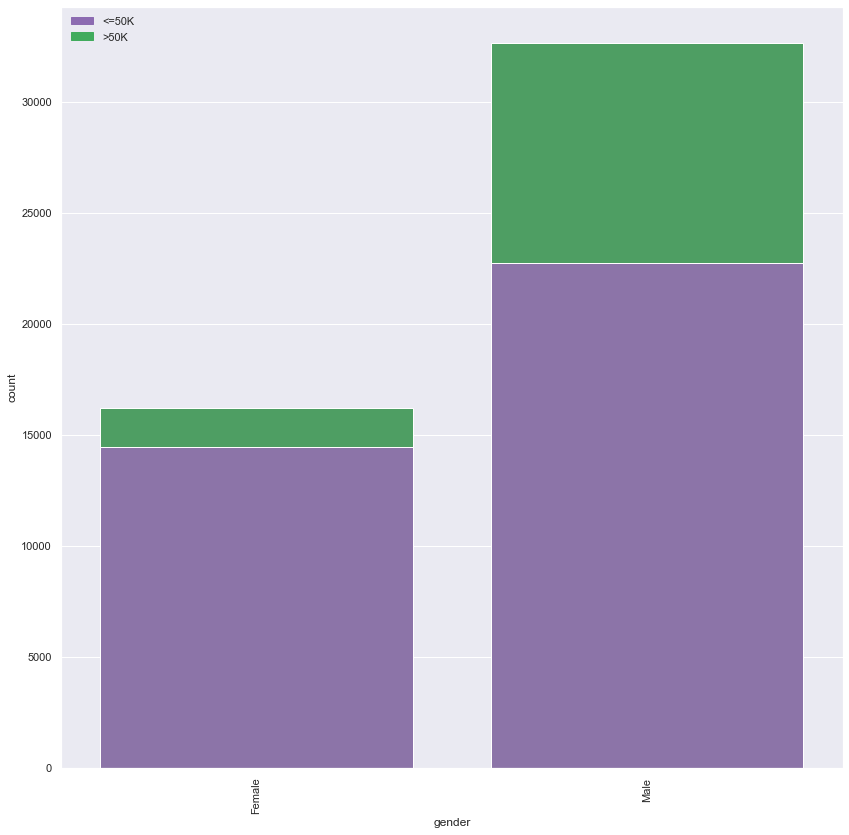

In [7]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(14, 14))

bar1 = sns.barplot(x="gender",  y="total", data=df_gender_income_total, color='#41ab5d')

bar2 = sns.barplot(x="gender",
                   y="<=50K",
                   data = df_gender_income_total,
                   color='#8c6bb1')

top_bar = mpatches.Patch(color='#8c6bb1', label='<=50K')
bottom_bar = mpatches.Patch(color='#41ab5d', label='>50K')
plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count')

plt.show()

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

In [8]:
df_workclass_income = df.groupby(['workclass'])['income'].value_counts().unstack().reset_index()
df_workclass_income

income,workclass,<=50K,>50K
0,?,2534.0,265.0
1,Federal-gov,871.0,561.0
2,Local-gov,2209.0,927.0
3,Never-worked,10.0,NaN
4,Private,26519.0,7387.0
5,Self-emp-inc,757.0,938.0
6,Self-emp-not-inc,2785.0,1077.0
7,State-gov,1451.0,530.0
8,Without-pay,19.0,2.0


In [9]:
df_workclass_income.loc[:, 'total'] = \
df_workclass_income.loc[:, '<=50K'].values + df_workclass_income.loc[:, '>50K']

df_workclass_income_total = df_workclass_income

df_workclass_income_total

income,workclass,<=50K,>50K,total
0,?,2534.0,265.0,2799.0
1,Federal-gov,871.0,561.0,1432.0
2,Local-gov,2209.0,927.0,3136.0
3,Never-worked,10.0,NaN,NaN
4,Private,26519.0,7387.0,33906.0
5,Self-emp-inc,757.0,938.0,1695.0
6,Self-emp-not-inc,2785.0,1077.0,3862.0
7,State-gov,1451.0,530.0,1981.0
8,Without-pay,19.0,2.0,21.0


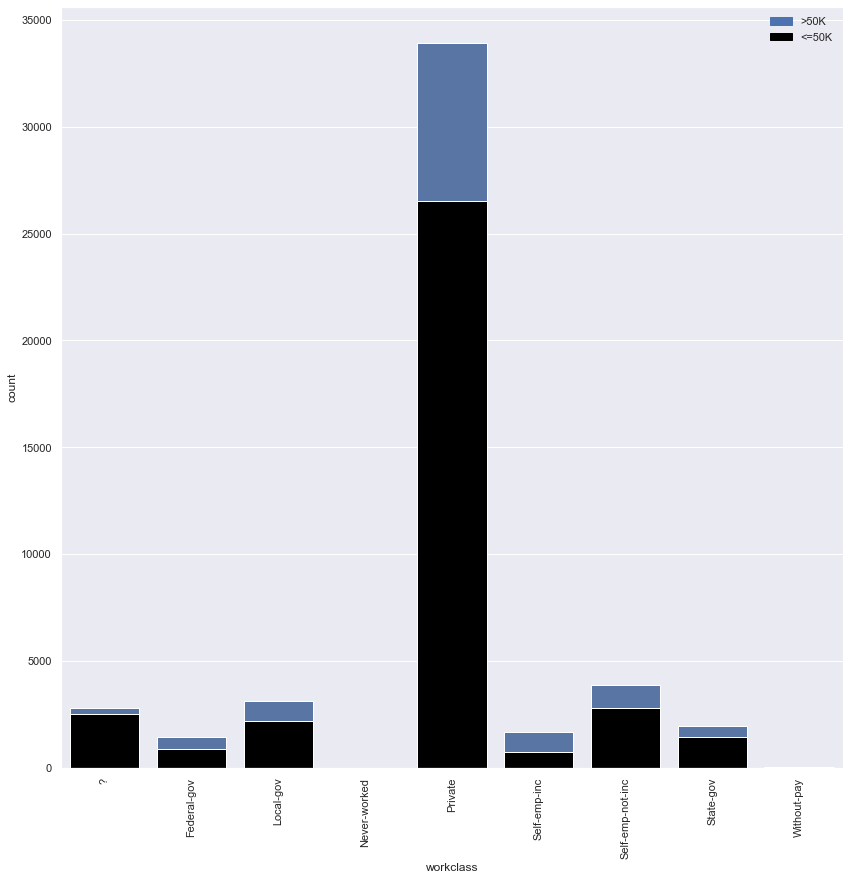

In [10]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(14, 14))

bar1 = sns.barplot(x="workclass",  y="total", data=df_workclass_income_total, color='b')

bar2 = sns.barplot(x="workclass",
                   y="<=50K",
                   data = df_workclass_income_total,
                   color='black')

top_bar = mpatches.Patch(color='b', label='>50K')
bottom_bar = mpatches.Patch(color='black', label='<=50K')

plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count')

plt.show()

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

In [11]:
df_education_income = df.groupby(['education'])['income'].value_counts().unstack().reset_index()
df_education_income

income,education,<=50K,>50K
0,10th,1302,87
1,11th,1720,92
2,12th,609,48
3,1st-4th,239,8
4,5th-6th,482,27
5,7th-8th,893,62
6,9th,715,41
7,Assoc-acdm,1188,413
8,Assoc-voc,1539,522
9,Bachelors,4712,3313


In [12]:
df_education_income.loc[:, 'total'] = \
df_education_income.loc[:, '<=50K'].values + df_education_income.loc[:, '>50K']

df_education_income_total = df_education_income

df_education_income_total

income,education,<=50K,>50K,total
0,10th,1302,87,1389
1,11th,1720,92,1812
2,12th,609,48,657
3,1st-4th,239,8,247
4,5th-6th,482,27,509
5,7th-8th,893,62,955
6,9th,715,41,756
7,Assoc-acdm,1188,413,1601
8,Assoc-voc,1539,522,2061
9,Bachelors,4712,3313,8025


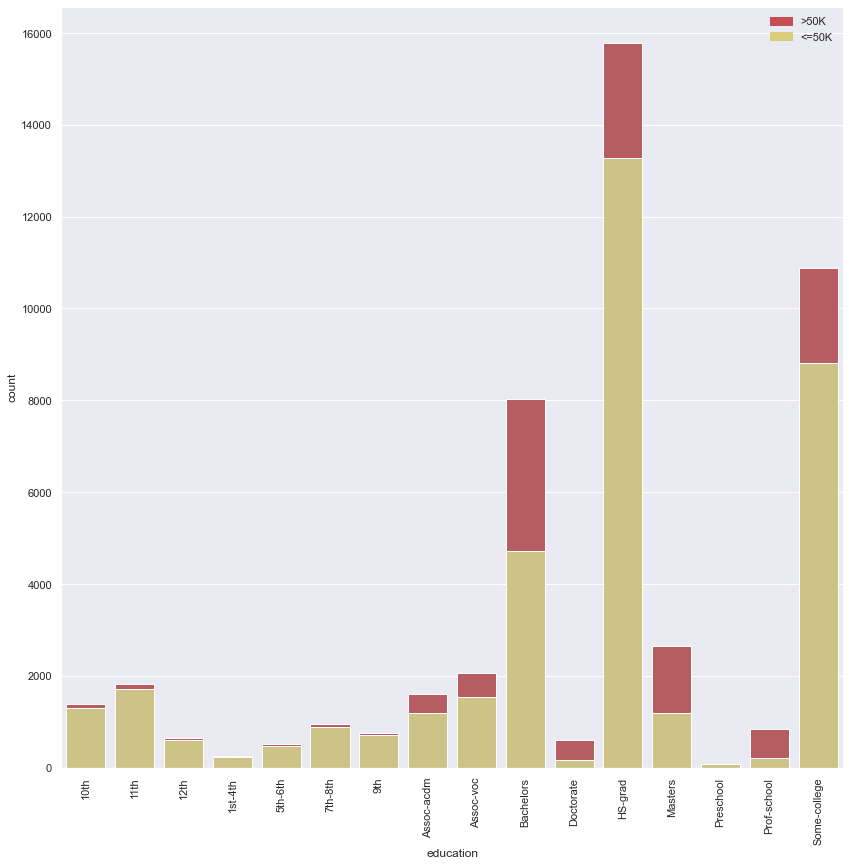

In [13]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(14, 14))

bar1 = sns.barplot(x="education",  y="total", data=df_education_income_total, color='r')

bar2 = sns.barplot(x="education",
                   y="<=50K",
                   data = df_education_income_total,
                   color='#D9CC7A')

top_bar = mpatches.Patch(color='r', label='>50K')
bottom_bar = mpatches.Patch(color='#D9CC7A', label='<=50K')

plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count')

plt.show()

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

In [14]:
df_marital_status_income = df.groupby(['marital-status'])['income'].value_counts().unstack().reset_index()
df_marital_status_income

income,marital-status,<=50K,>50K
0,Divorced,5962,671
1,Married-AF-spouse,23,14
2,Married-civ-spouse,12395,9984
3,Married-spouse-absent,570,58
4,Never-married,15384,733
5,Separated,1431,99
6,Widowed,1390,128


In [15]:
df_marital_status_income.loc[:, 'total'] = \
df_marital_status_income.loc[:, '<=50K'].values + df_marital_status_income.loc[:, '>50K']

df_marital_status_income_total = df_marital_status_income

df_marital_status_income_total

income,marital-status,<=50K,>50K,total
0,Divorced,5962,671,6633
1,Married-AF-spouse,23,14,37
2,Married-civ-spouse,12395,9984,22379
3,Married-spouse-absent,570,58,628
4,Never-married,15384,733,16117
5,Separated,1431,99,1530
6,Widowed,1390,128,1518


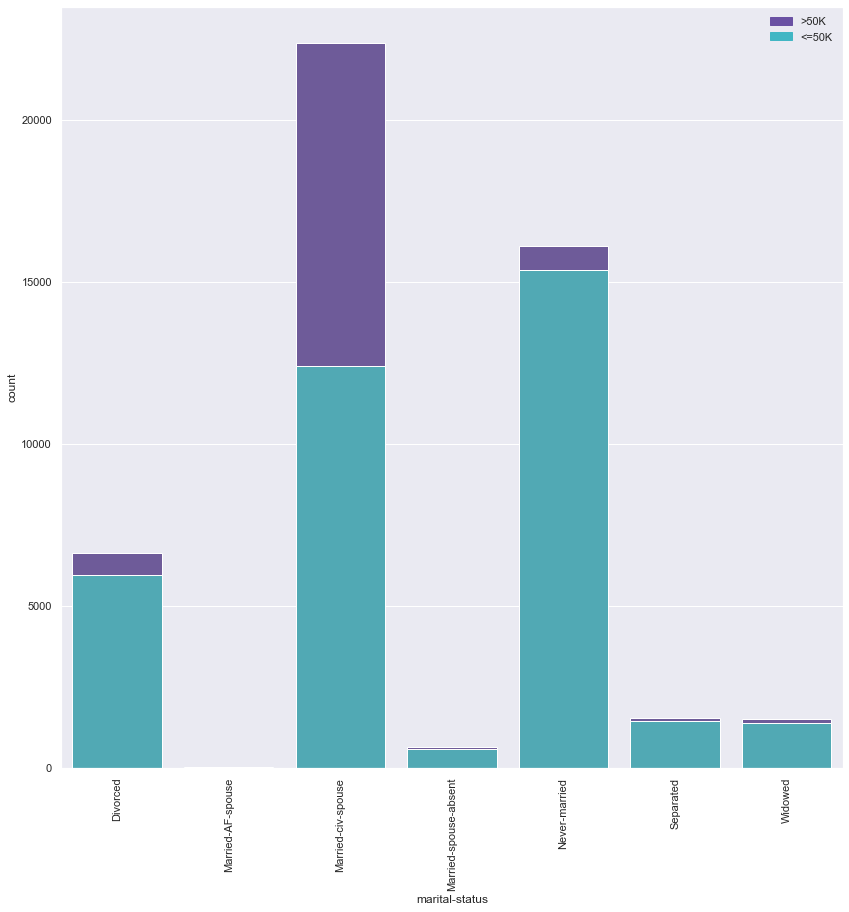

In [71]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(14, 14))

bar1 = sns.barplot(x="marital-status",  y="total", data=df_marital_status_income, color='#6a51a3')

bar2 = sns.barplot(x="marital-status",
                   y="<=50K",
                   data = df_marital_status_income,
                   color='#41b6c4')

top_bar = mpatches.Patch(color='#6a51a3', label='>50K')
bottom_bar = mpatches.Patch(color='#41b6c4', label='<=50K')

plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count')

plt.show()

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

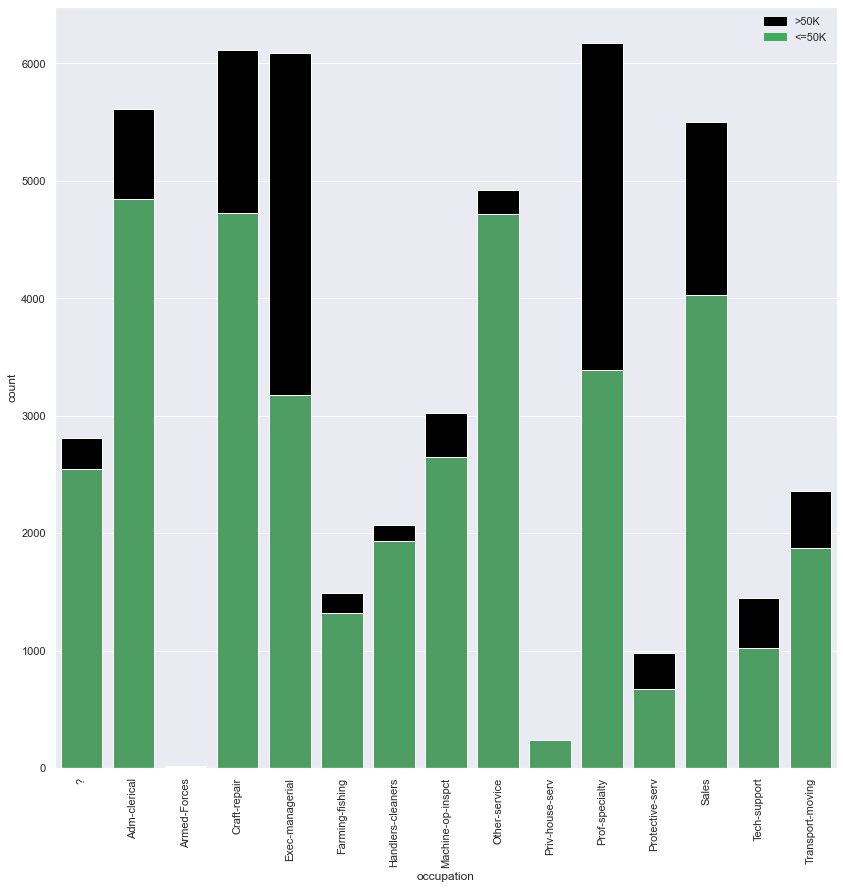

In [57]:
df_occupation_income = df.groupby(['occupation'])['income'].value_counts().unstack().reset_index()

df_occupation_income.loc[:, 'total'] = \
df_occupation_income.loc[:, '<=50K'].values + df_occupation_income.loc[:, '>50K']

df_occupation_income_total = df_occupation_income

import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(14, 14))

bar1 = sns.barplot(x="occupation",  y="total", data=df_occupation_income, color='black')

bar2 = sns.barplot(x="occupation",
                   y="<=50K",
                   data = df_occupation_income,
                   color='#41ab5d')

top_bar = mpatches.Patch(color='black', label='>50K')
bottom_bar = mpatches.Patch(color='#41ab5d', label='<=50K')

plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count')

plt.show()

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

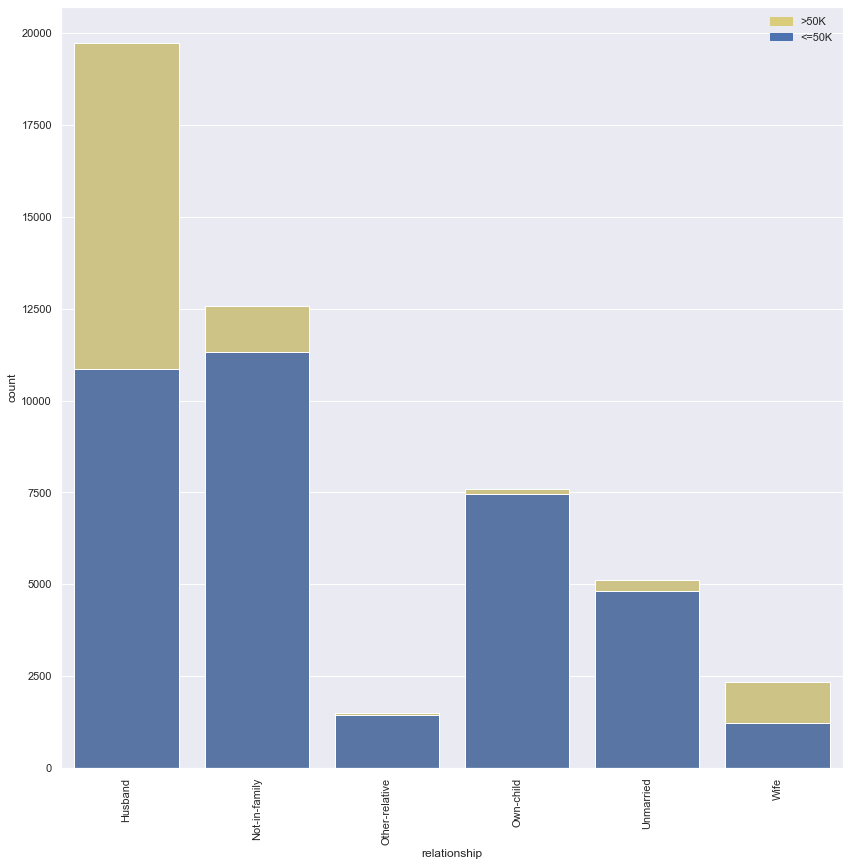

In [64]:
df_relationship_income = df.groupby(['relationship'])['income'].value_counts().unstack().reset_index()

df_relationship_income.loc[:, 'total'] = \
df_relationship_income.loc[:, '<=50K'].values + df_relationship_income.loc[:, '>50K']

df_relationship_income_total = df_relationship_income

import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(14, 14))

bar1 = sns.barplot(x="relationship",  y="total", data=df_relationship_income, color='#D9CC7A')

bar2 = sns.barplot(x="relationship",
                   y="<=50K",
                   data = df_occupation_income,
                   color='b')

top_bar = mpatches.Patch(color='#D9CC7A', label='>50K')
bottom_bar = mpatches.Patch(color='b', label='<=50K')

plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count')

plt.show()

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

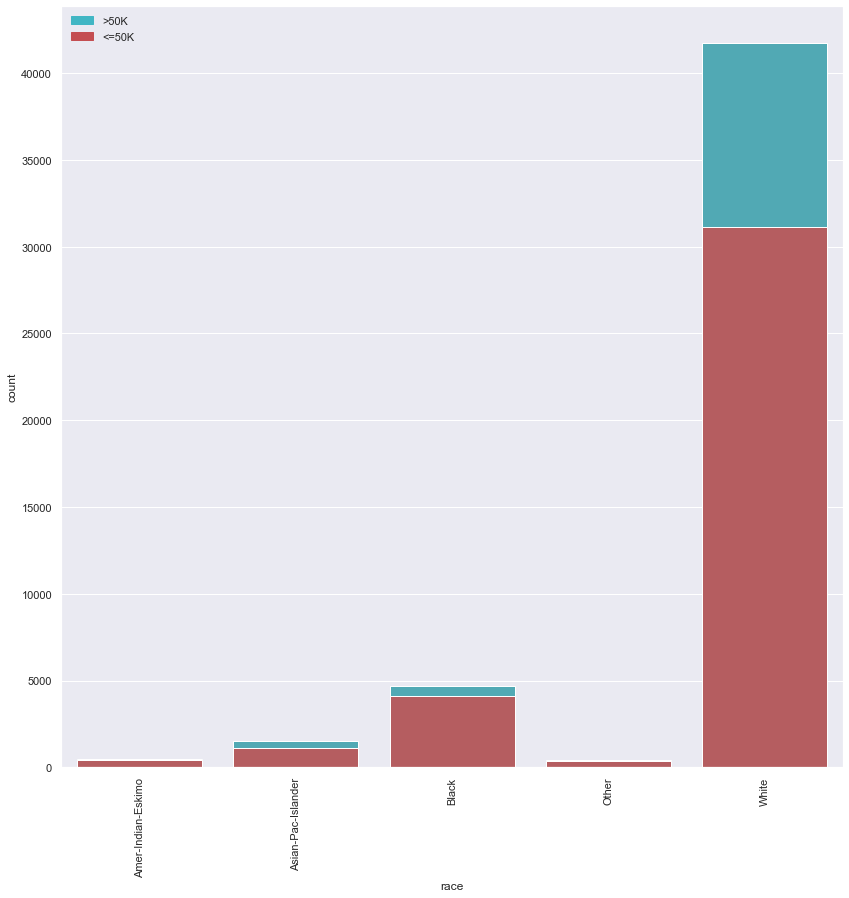

In [74]:
df_race_income = df.groupby(['race'])['income'].value_counts().unstack().reset_index()

df_race_income.loc[:, 'total'] = \
df_race_income.loc[:, '<=50K'].values + df_race_income.loc[:, '>50K']

df_race_income_total = df_race_income

import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(14, 14))

bar1 = sns.barplot(x="race",  y="total", data=df_race_income_total, color='#41b6c4')

bar2 = sns.barplot(x="race",
                   y="<=50K",
                   data = df_race_income_total,
                   color='r')

top_bar = mpatches.Patch(color='#41b6c4', label='>50K')
bottom_bar = mpatches.Patch(color='r', label='<=50K')

plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count')

plt.show()

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

(51, 8)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA
23,9.6,2.208,2.784,8.448,8.448,777.18,133.35,MN
21,8.2,1.886,2.870,7.134,6.560,1011.14,135.63,MA
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC


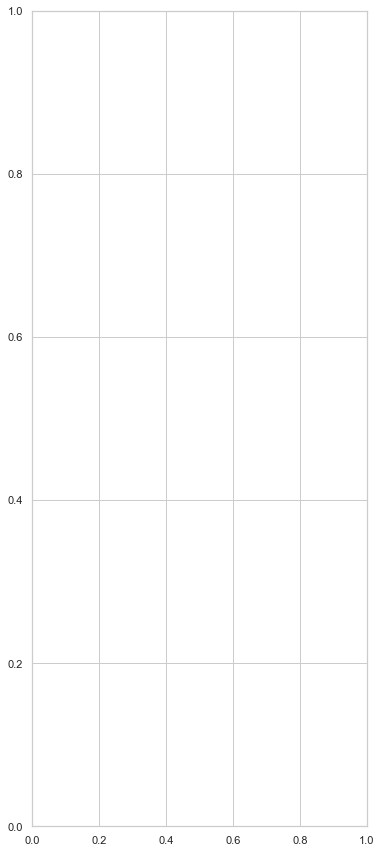

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

p(crashes)

No handles with labels found to put in legend.


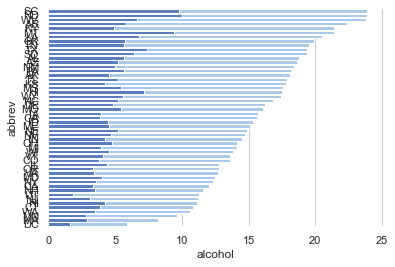

In [18]:

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [19]:
df_plot = df.groupby(['income','race']).size().reset_index().pivot(columns='income', index='race', values=0)
df_plot

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,415,55
Asian-Pac-Islander,1110,409
Black,4119,566
Other,356,50
White,31155,10607


In [20]:
df_plot.reset_index()

income,race,<=50K,>50K
0,Amer-Indian-Eskimo,415,55
1,Asian-Pac-Islander,1110,409
2,Black,4119,566
3,Other,356,50
4,White,31155,10607


In [21]:
df.loc[:,['race', 'fnlwgt', 'income']]

,race,fnlwgt,income
0,Black,226802,<=50K
1,White,89814,<=50K
2,White,336951,>50K
3,Black,160323,>50K
4,White,103497,<=50K
...,...,...,...
48837,White,257302,<=50K
48838,White,154374,>50K
48839,White,151910,<=50K
48840,White,201490,<=50K


In [22]:
df.groupby(['race', 'income'])['fnlwgt'].sum().to_frame()

fnlwgt
race               income            
Amer-Indian-Eskimo <=50K     49594008
                   >50K       6858155
Asian-Pac-Islander <=50K    175137113
                   >50K      67594449
Black              <=50K    946720482
                   >50K     133102073
Other              <=50K     69561458
                   >50K       9899112
White              <=50K   5819906996
                   >50K    1985201816

In [23]:
df.fnlwgt.sum() / 10**6

9263.575662

<font color='red'> I thought final weight was supposed to represent number of people per row permutation, why does it seem to appear we have 9.3 billion people represented here???</font> -maybe ignore estimate for now????

In [24]:
df.groupby(['race'])['income'].value_counts()

race                income
Amer-Indian-Eskimo  <=50K       415
                    >50K         55
Asian-Pac-Islander  <=50K      1110
                    >50K        409
Black               <=50K      4119
                    >50K        566
Other               <=50K       356
                    >50K         50
White               <=50K     31155
                    >50K      10607
Name: income, dtype: int64

In [25]:
df.groupby(['race'])['income'].value_counts().to_frame().stack()

race                income        
Amer-Indian-Eskimo  <=50K   income      415
                    >50K    income       55
Asian-Pac-Islander  <=50K   income     1110
                    >50K    income      409
Black               <=50K   income     4119
                    >50K    income      566
Other               <=50K   income      356
                    >50K    income       50
White               <=50K   income    31155
                    >50K    income    10607
dtype: int64

In [26]:
 df.groupby(['race'])['income'].value_counts()

race                income
Amer-Indian-Eskimo  <=50K       415
                    >50K         55
Asian-Pac-Islander  <=50K      1110
                    >50K        409
Black               <=50K      4119
                    >50K        566
Other               <=50K       356
                    >50K         50
White               <=50K     31155
                    >50K      10607
Name: income, dtype: int64

In [27]:
df_groupby_race_entries_income_unstack  = \
df.groupby(['race'])['income'].value_counts().unstack()

df_groupby_race_entries_income_unstack

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,415,55
Asian-Pac-Islander,1110,409
Black,4119,566
Other,356,50
White,31155,10607


In [28]:
df_groupby_race_entries_income_unstack['total'] = \
df_groupby_race_entries_income_unstack.loc[:, '<=50K'] + df_groupby_race_entries_income_unstack.loc[:, '>50K']

df_groupby_race_entries_income_unstack

income,<=50K,>50K,total
race,,,
Amer-Indian-Eskimo,415,55,470
Asian-Pac-Islander,1110,409,1519
Black,4119,566,4685
Other,356,50,406
White,31155,10607,41762


In [29]:
df_groupby_race_entries_income_unstack_reset_index = \
df_groupby_race_entries_income_unstack.reset_index()

df_groupby_race_entries_income_unstack_reset_index

income,race,<=50K,>50K,total
0,Amer-Indian-Eskimo,415,55,470
1,Asian-Pac-Islander,1110,409,1519
2,Black,4119,566,4685
3,Other,356,50,406
4,White,31155,10607,41762


In [30]:
df_groupby_race_entries_income_unstack_reset_index.index.name = None

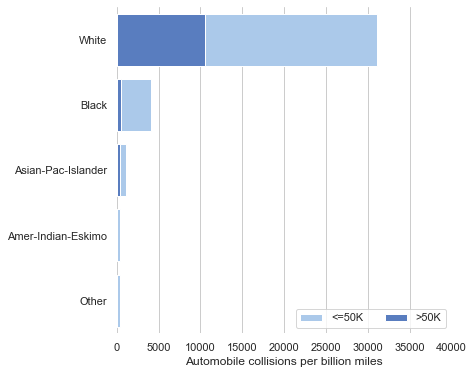

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Load the example car crash dataset
crashes = df_groupby_race_entries_income_unstack_reset_index.sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="<=50K", y="race", data=crashes,
            label="<=50K", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=">50K", y="race", data=crashes,
            label=">50K", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 40000), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [32]:
crashes

income,race,<=50K,>50K,total
4,White,31155,10607,41762
2,Black,4119,566,4685
1,Asian-Pac-Islander,1110,409,1519
0,Amer-Indian-Eskimo,415,55,470
3,Other,356,50,406


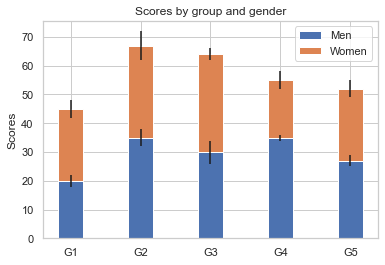

In [33]:
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [34]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [35]:
df_plot = df.groupby(['income','race']).size().reset_index().pivot(columns='income', index='race', values=0)

<AxesSubplot:xlabel='race'>

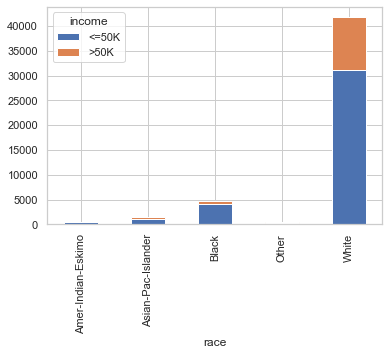

In [36]:
df_plot.plot(kind='bar', stacked=True)

income              <=50K   >50K
race                            
Amer-Indian-Eskimo    415     55
Asian-Pac-Islander   1110    409
Black                4119    566
Other                 356     50
White               31155  10607


<AxesSubplot:title={'center':'Stacked Bar Graph'}, ylabel='race'>

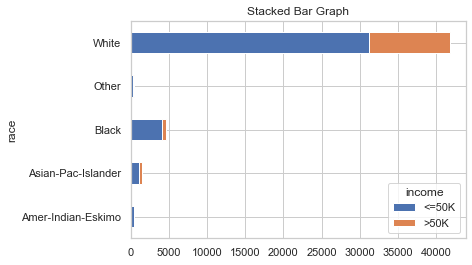

In [37]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
  
# load dataset
  
# view dataset
print(df_plot)
  
# plot a Stacked Bar Chart using matplotlib
df_plot.reset_index().plot(
    x = 'race',
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [38]:
df_plot = df_plot.reset_index()

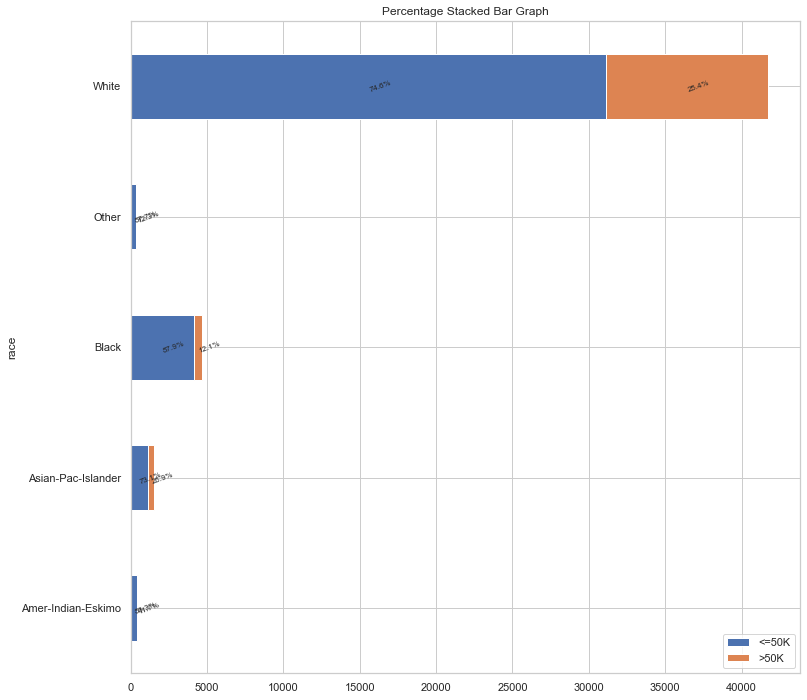

In [39]:
# plot a Stacked Bar Chart using matplotlib
df_plot.plot(
  x = 'race', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True,
  figsize=(12,12)).legend(loc='lower right')
  
df_total = df_plot[">50K"] + df_plot["<=50K"]
df_rel = df_plot[df_plot.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_plot.iloc[:, 1:].cumsum(1)[n], 
                                         df_plot[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'left', rotation = 20, fontsize = 8)
        
#https://www.geeksforgeeks.org/stacked-percentage-bar-plot-in-matplotlib/

<AxesSubplot:xlabel='income'>

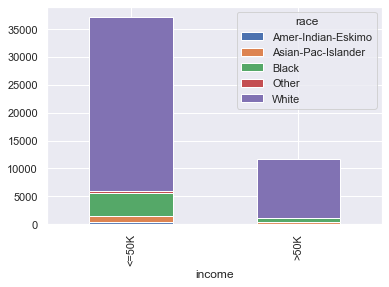

In [40]:
import seaborn as sns
sns.set()
df_plot.set_index('race').T.plot(kind='bar', stacked=True)

In [41]:
df_plot = df.groupby(['income','race']).size().reset_index().pivot(columns='race', index='income', values=0)
df_plot

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
income,,,,,
<=50K,415,1110,4119,356,31155
>50K,55,409,566,50,10607


<AxesSubplot:xlabel='race'>

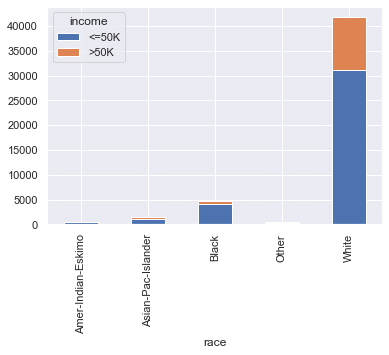

In [42]:
import seaborn as sns
sns.set()
df_plot.T.plot(kind='bar',
               stacked=True)

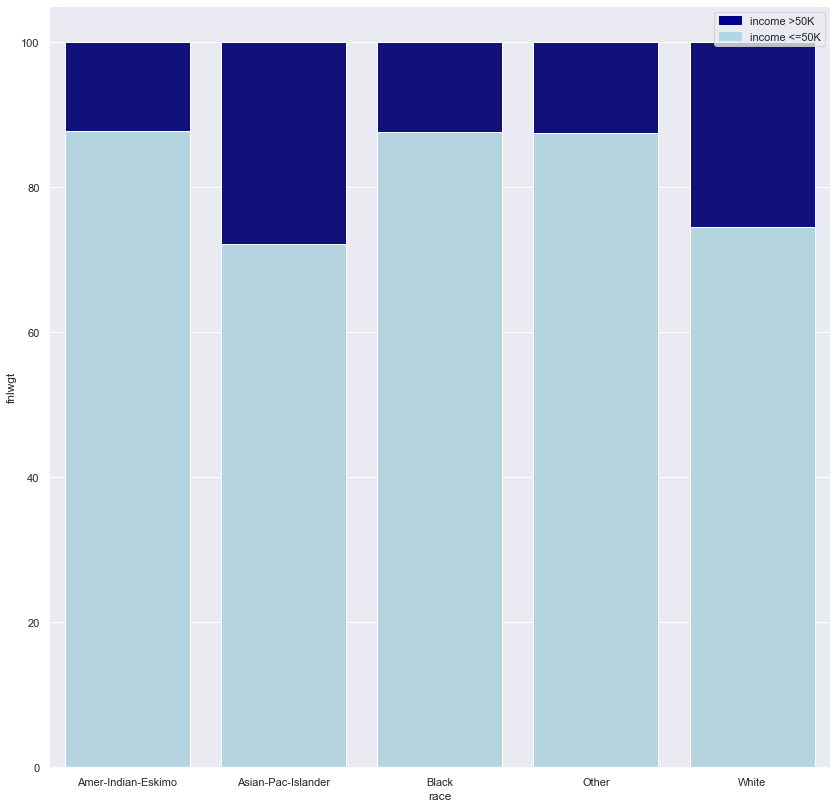

In [43]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
tips = df

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = tips.groupby('race')['fnlwgt'].sum().reset_index()
smoker = tips[tips.income=='<=50K'].groupby('race')['fnlwgt'].sum().reset_index()
smoker['fnlwgt'] = [i / j * 100 for i,j in zip(smoker['fnlwgt'], total['fnlwgt'])]
total['fnlwgt'] = [i / j * 100 for i,j in zip(total['fnlwgt'], total['fnlwgt'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="race",  y="fnlwgt", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="race", y="fnlwgt", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='income >50K')
bottom_bar = mpatches.Patch(color='lightblue', label='income <=50K')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [44]:
agg_tips = df_groupby_race_entries_income_unstack
agg_tips = agg_tips.drop(columns='total')
agg_tips

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,415,55
Asian-Pac-Islander,1110,409
Black,4119,566
Other,356,50
White,31155,10607


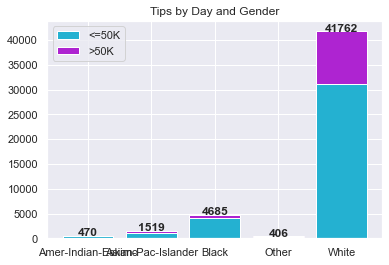

In [45]:
fig, ax = plt.subplots()

colors = ['#24b1d1', '#ae24d1']
bottom = np.zeros(len(agg_tips))

for i, col in enumerate(agg_tips.columns):
  ax.bar(
      agg_tips.index, agg_tips[col], bottom=bottom, label=col, color=colors[i])
  bottom += np.array(agg_tips[col])

# Sum up the rows of our data to get the total value of each bar.
totals = agg_tips.sum(axis=1)
# Set an offset that is used to bump the label up a bit above the bar.
y_offset = 4
# Add labels to each bar.
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

ax.set_title('Tips by Day and Gender')
ax.legend()

#https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/

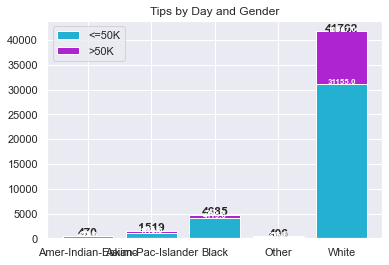

In [46]:
fig, ax = plt.subplots()

colors = ['#24b1d1', '#ae24d1']
bottom = np.zeros(len(agg_tips))

for i, col in enumerate(agg_tips.columns):
  ax.bar(
      agg_tips.index, agg_tips[col], bottom=bottom, label=col, color=colors[i])
  bottom += np.array(agg_tips[col])

totals = agg_tips.sum(axis=1)
y_offset = 4
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -15
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=8
  )

ax.set_title('Tips by Day and Gender')
ax.legend()

#https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/

In [47]:
#***

#horizontal stacked

#https://stackoverflow.com/questions/51495982/display-totals-and-percentage-in-stacked-bar-chart-using-dataframe-plot




In [48]:
df_total = df['Total Cost']
df = df.iloc[:, 0:4]
df.plot(x = 'Airport', kind='barh',stacked = True, title = 'Breakdown of Costs', mark_right = True)

df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc, tot) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], df[n], df_rel[n], df_total)):
        plt.text(tot, i, str(tot), va='center')
        plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center')

KeyError: 'Total Cost'

In [ ]:
#***

#percentages in seaborn

#https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

## 3.6 Summary<a id='3.6_Summary'></a>